In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')
import itertools
import scipy.stats as scs
import statsmodels.api as sm

In [2]:
from get_clean_data_LinReg import get_data, clean_data, get_feats, get_target, partition_feats_by_ptp_cnt,\
    get_more_feats, partition_more_feats_by_ptp_cnt
from plot_results_and_residuals import plot_results, plot_residuals, plot_student_residuals, plot_results_bars, plot_results_bars_compare

<h3>Variable List: </h3>
<ul><li>model_dict : Dictionary of linear regression models fit with 2014 data divided by plan participant count
<li>partitioned_dict_of_df_XX : Dictionary of tuples:<br>X (features matrix): Pandas dataframes of 20XX plan features divided by plan participant count, <br>y (target series): Pandas Series of 20XX+1 actual funding target 
<li>predict_dict_XX : Dictionary of predicted 20XX+1 funding targets (predicted off 20XX features)
<li>student_resids_XX : Dictionary of studentized residuals

<h1>Get training data: 2014 Schedule SB, H and Form 5500 filing fields </h1>
<h3>In dictionary with keys = participant count range (partitions)</h3>

<h3>Features:</h3>
    <ul><li>Prior year funding target
        <li>Prior year target normal cost (expected growth in funding target)
        <li>Prior year benefits paid
        <li>Prior year effective interest rate (single effective rate that approximates the effect of 3-tiered rates actually used to value funding target
    </ul>
<h3>Interaction Features:</h3>
    <ul><li>Effective interst rate x prior year funding target
        <li>Effective interst rate x prior year target normal cost (expected growth in funding target)
        <li>Effective interst rate x prior year benefits paid (1/2 year)
    </ul>

In [3]:
partitioned_dict_of_df_14 = partition_feats_by_ptp_cnt(2014)

In [4]:
partition_list = [(0,300),(300,500),(500,800),(800,1500),(1500,2500),(2500,5000),(5000,10000),(10000,50000),(50000,100000),(100000,500000)]

<b>Number of plans in each partition of data</b>:

In [ ]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_14[i][0]))

<h1>Create dictionary of linear models (OLS) fitted on 2014 partitioned data</h1>

In [5]:
model_dict = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_14[i]
    model_dict[i] = sm.OLS(y, X, hasconst=False).fit()
    print(i, model_dict[i].summary())

(0, 300)                             OLS Regression Results                            
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.797e+04
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:28:47   Log-Likelihood:                -23676.
No. Observations:                1500   AIC:                         4.736e+04
Df Residuals:                    1497   BIC:                         4.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eir_ft         1.0185      0.006    176.963

<h1>Create dictionary of linear models (WLS) fitted on 2014 partitioned data</h1>

In [6]:
model_dict_wls = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_14[i]
    model_dict_wls[i] = sm.WLS(y, X, hasconst=False).fit()
    print(i, model_dict_wls[i].summary())

(0, 300)                             WLS Regression Results                            
Dep. Variable:         fndng_tgt_2015   R-squared:                       0.987
Model:                            WLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.797e+04
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:28:50   Log-Likelihood:                -23676.
No. Observations:                1500   AIC:                         4.736e+04
Df Residuals:                    1497   BIC:                         4.737e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
eir_ft         1.0185      0.006    176.963

<h1>Test on 2015 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [7]:
partitioned_dict_of_df_15 = partition_feats_by_ptp_cnt(2015)

<b>Distribution of plan sizes</b>

In [8]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_15[i][0]))

(0, 300) : 1466
(300, 500) : 672
(500, 800) : 568
(800, 1500) : 675
(1500, 2500) : 460
(2500, 5000) : 488
(5000, 10000) : 348
(10000, 50000) : 306
(50000, 100000) : 50
(100000, 500000) : 28


Calculate # of plans with 10k+ participants as % of total

In [88]:
np.sum(list(num_plans.values())[7:11])/np.sum(list(num_plans.values()))

0.07587433313574392

In [93]:
from matplotlib import colors as mcolors

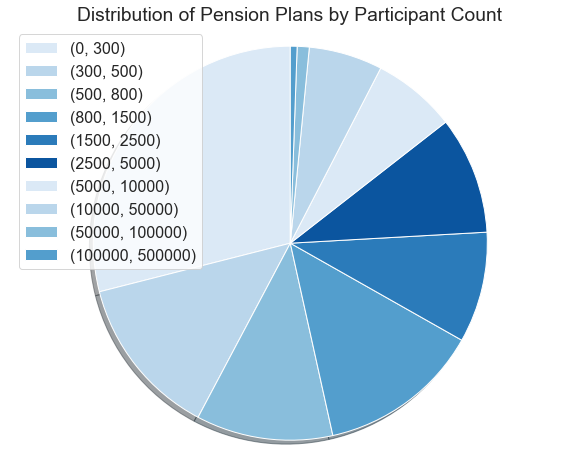

In [97]:
labels = list(partitioned_dict_of_df_15.keys())
sizes = list(num_plans.values())
#colors = ['midnightblue', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
sns.set_palette("Blues")
# Plot
#plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=140)
#colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)

plt.figure(figsize=(10,8))
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
#plt.tight_layout()
plt.title('Distribution of Pension Plans by Participant Count')
plt.show()

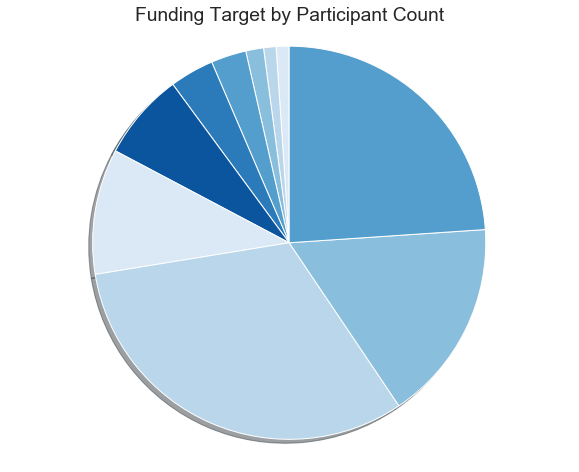

In [103]:
labels = list(partitioned_dict_of_df_15.keys())
sizes = list(total_ft.values())
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice
sns.set_palette("Blues")
# Plot
#plt.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=140)
plt.figure(figsize=(10,8))
patches, texts = plt.pie(sizes, shadow=True, startangle=90)
#plt.legend(patches, labels, loc="upper left")
plt.axis('equal')

plt.title('Funding Target by Participant Count')
plt.show()

In [52]:
total_ft_list = list(total_ft.values())

In [59]:
total_ft_list

[16241683962.0,
 15667903088.0,
 22352847138.0,
 44262913353.0,
 55604956907.0,
 109609567962.0,
 157621780333.0,
 486693852356.0,
 254274787065.0,
 365621834651.0]

In [60]:
np.sum(total_ft_list[7:11])/np.sum(total_ft_list)

0.724231116048561

In [62]:
total_ft = {}
num_plans = {}
total_pred = {}
total_pred_w = {}
for i in partition_list:
    total_ft[i] = np.sum(partitioned_dict_of_df_15[i][1])
    total_pred[i] = np.sum(predict_dict_15[i])
    total_pred_w[i] = np.sum(predict_dict_wls_15[i])
    num_plans[i] = len(partitioned_dict_of_df_15[i][0])

In [70]:
total_pred.values()

dict_values([16276985323.437061, 16108675459.702301, 22803078845.480072, 44612399544.40886, 55287984273.41323, 111279493298.56921, 167345453898.94397, 494376484031.48663, 256052198666.9027, 365927076887.1324])

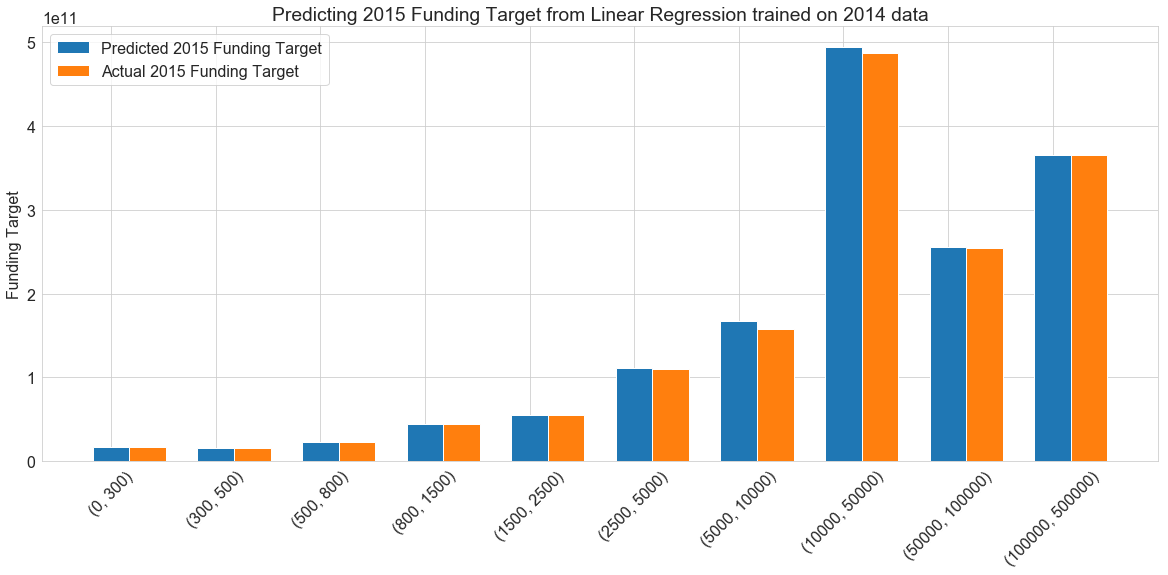

In [82]:
xx = np.linspace(0,9,10)
plt.figure(figsize=(20,8))
plt.bar(xx, list(total_pred.values()), label='Predicted {} Funding Target'.format(2015), width=.35 )
plt.bar(xx+.35, list(total_ft.values()), label='Actual {} Funding Target'.format(2015), width=.35)
#plt.scatter(y_true,y_pred, s=20, color=next(colors), label="data")
labels = list(total_pred.keys())
plt.xticks(xx, labels, rotation=45)
#plt.xlabel(list(total_pred.keys()))
plt.ylabel("Funding Target")
plt.title("Predicting {} Funding Target from Linear Regression trained on {} data".format(2015, 2014))
plt.legend()
plt.show()


In [9]:
predict_dict_15 = {}
studentized_resids_15 = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_15[i]
    predict_dict_15[i] = model_dict[i].predict(X)
    studentized_resids_15[i] = model_dict[i].outlier_test()

In [10]:
predict_dict_wls_15 = {}
scores_wls_15 = []
for i in partition_list:
    X, y = partitioned_dict_of_df_15[i]
    predict_dict_wls_15[i] = model_dict_wls[i].predict(X)

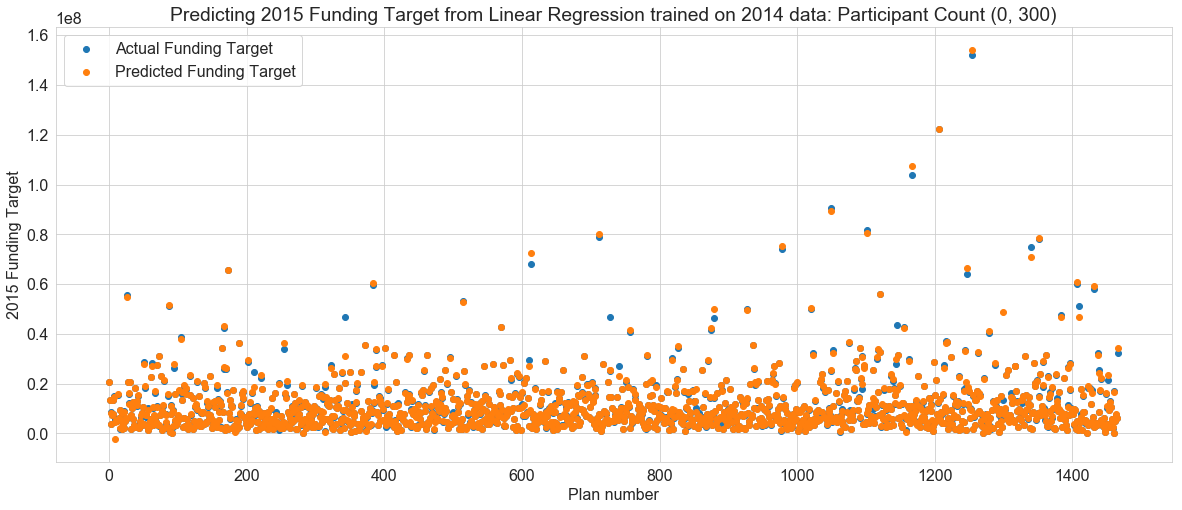

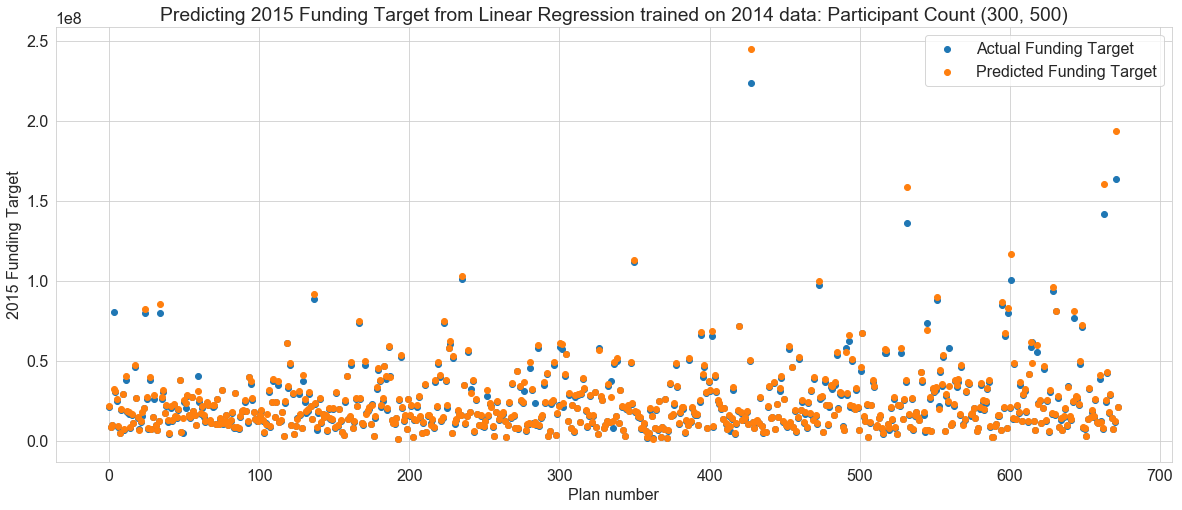

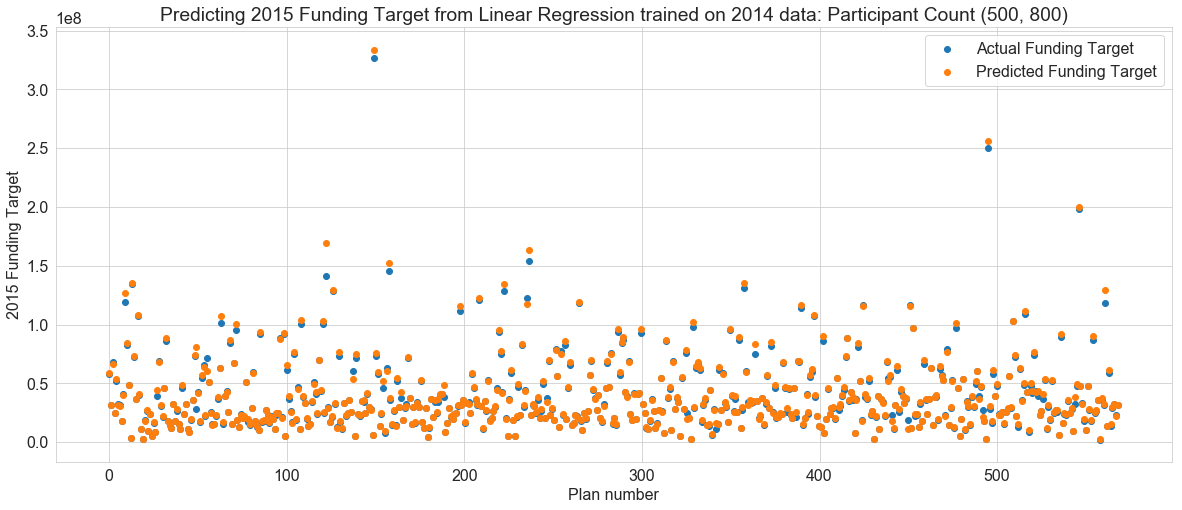

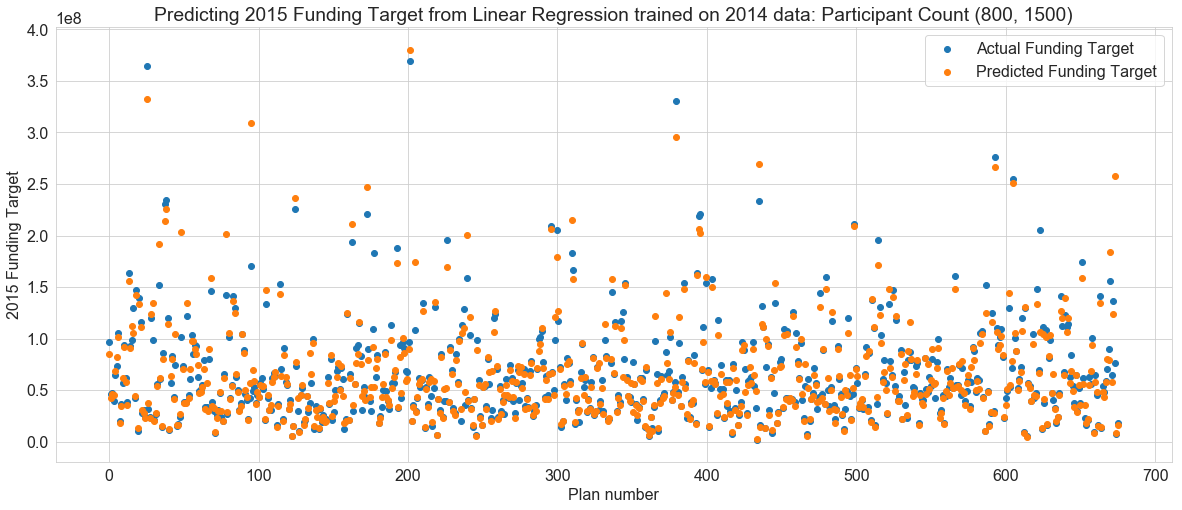

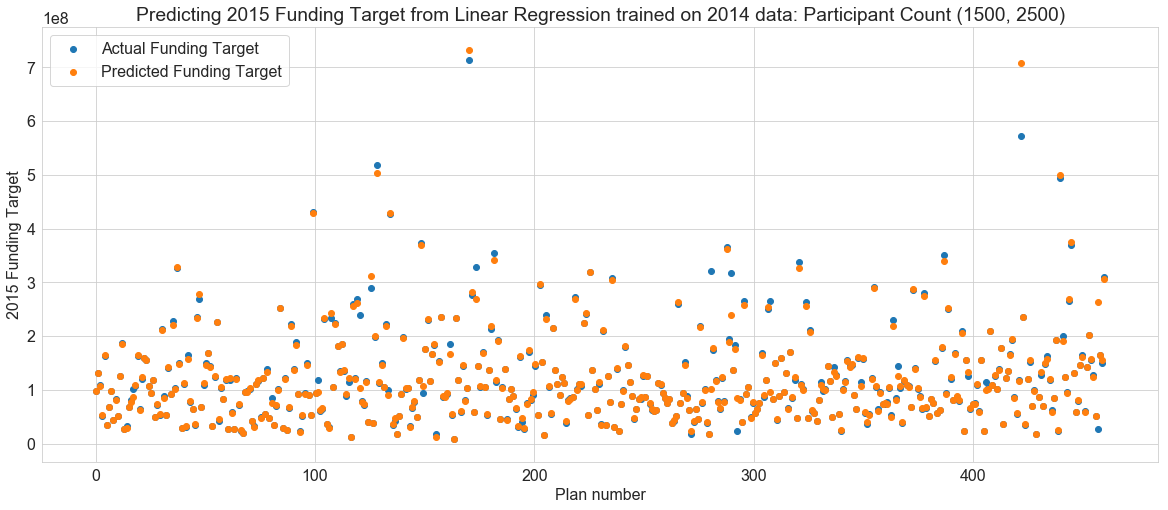

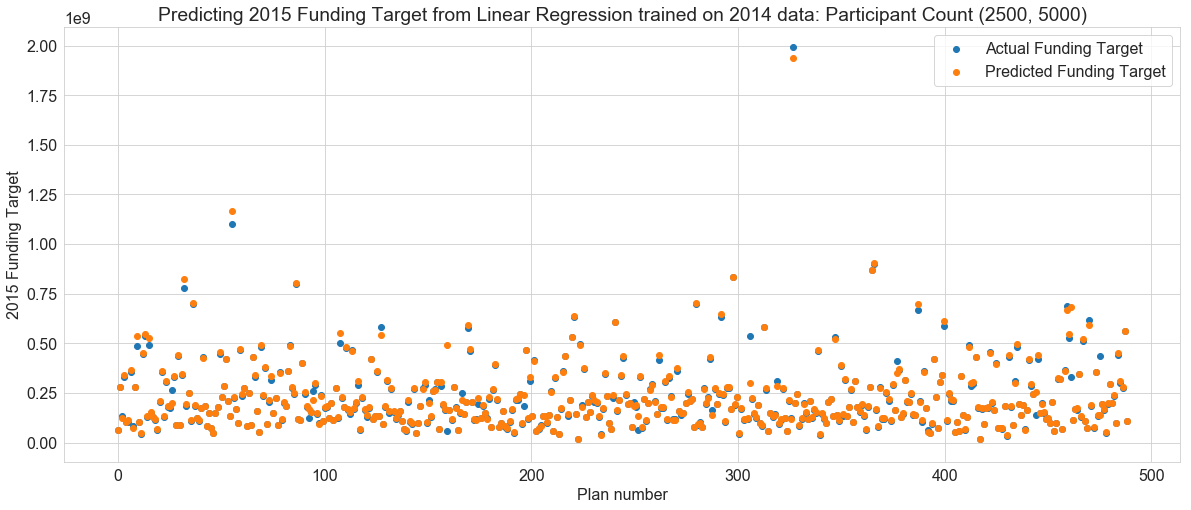

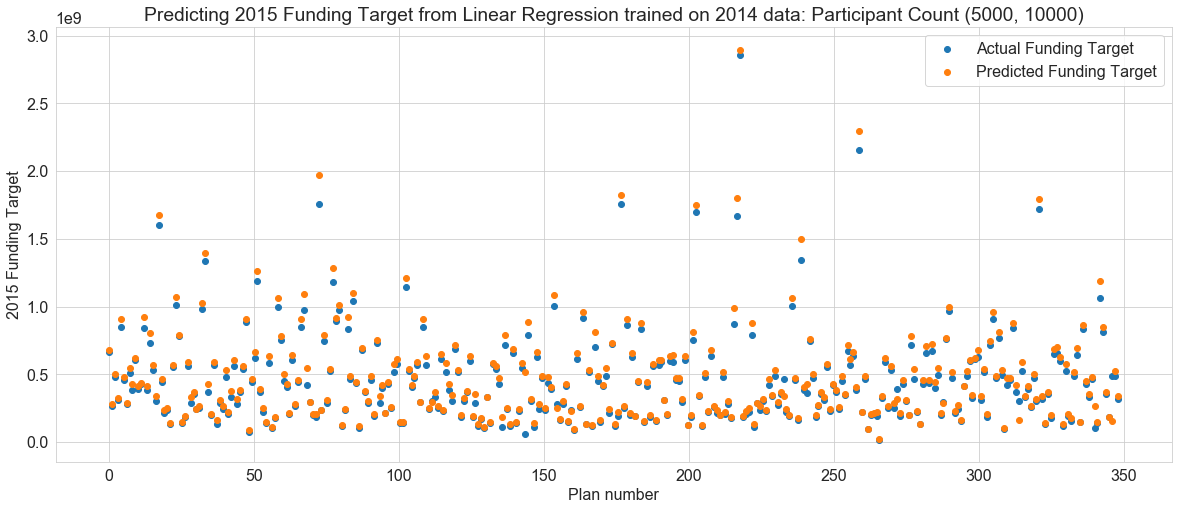

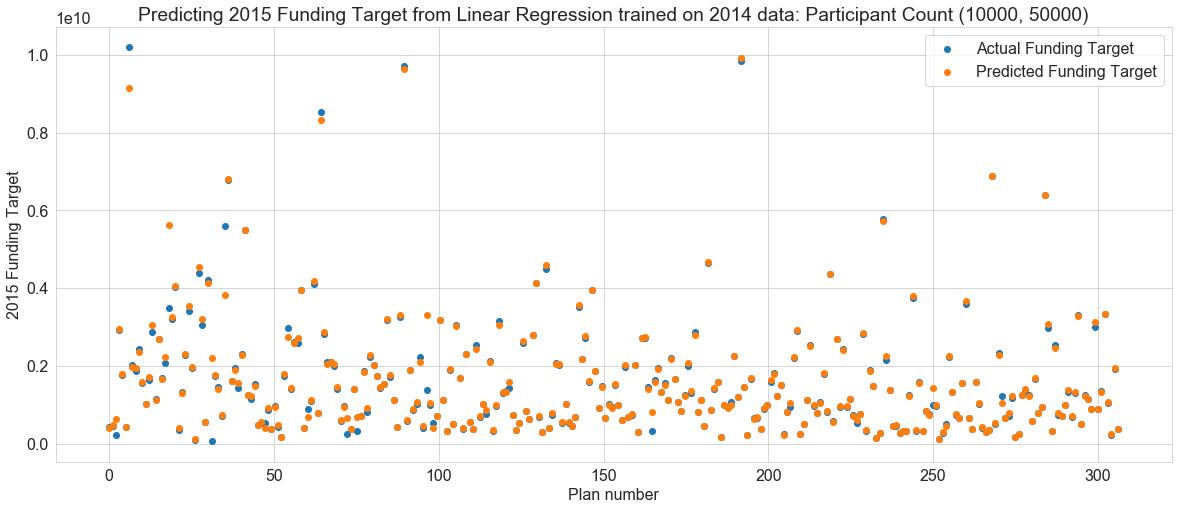

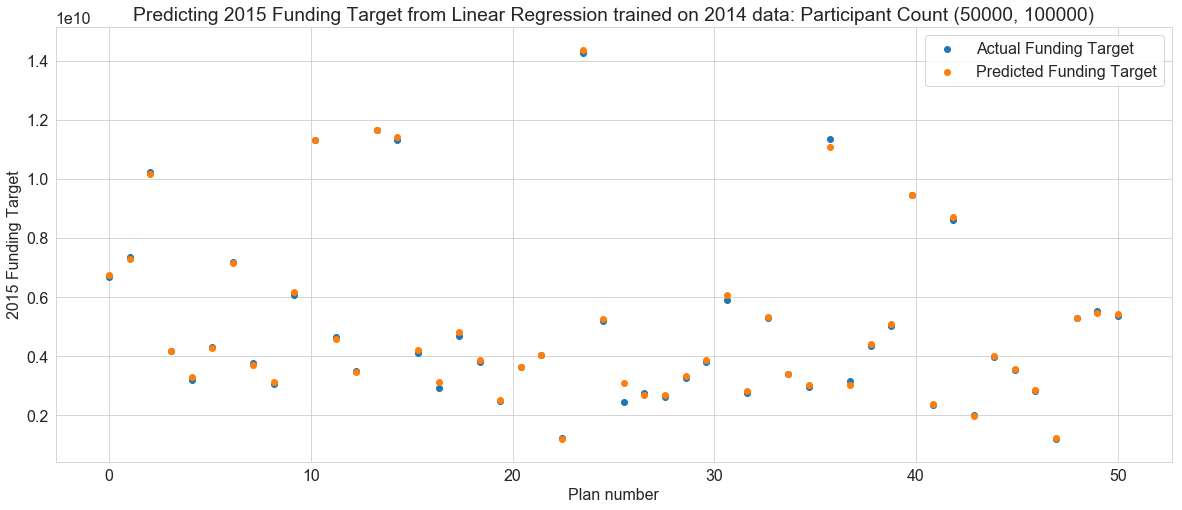

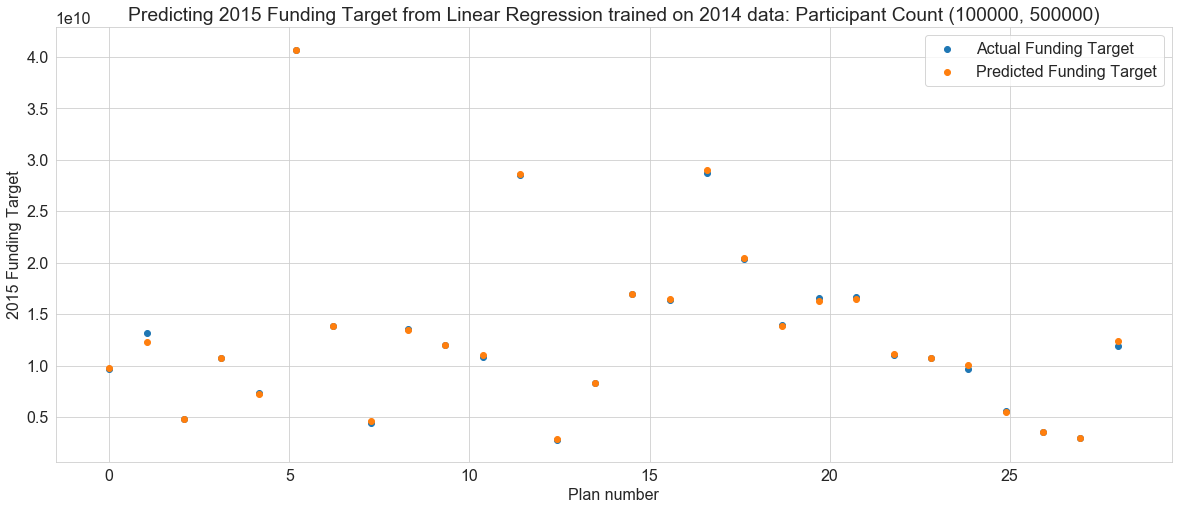

In [89]:
resids_15 = {}
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    resids_15[i] = y_true - y_pred
    plot_results(y_true, y_pred, i, 2015, 2014)

In [ ]:
for i in partition_list:
    print(len(partitioned_dict_of_df_15[i][0]))

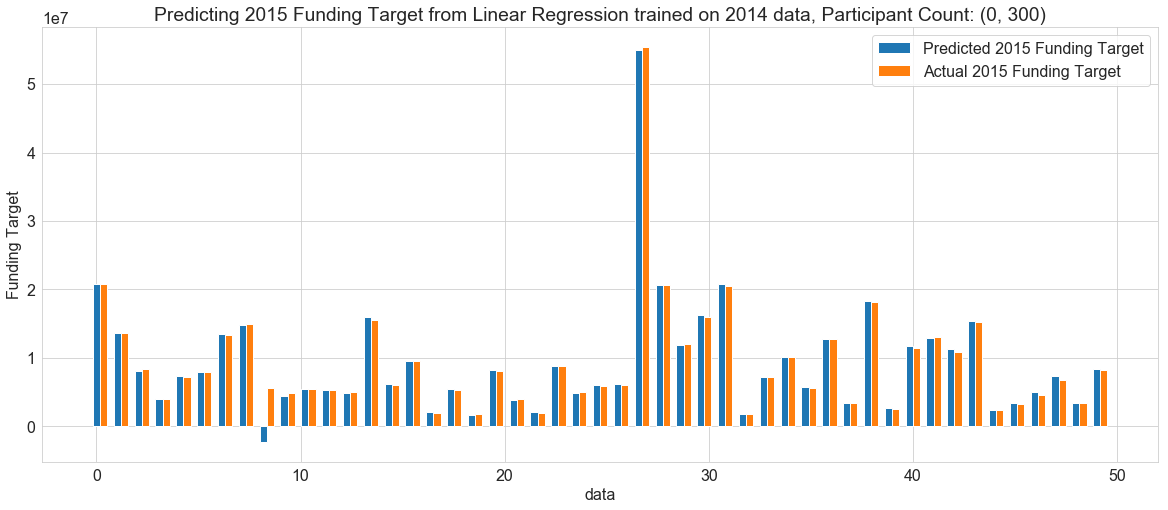

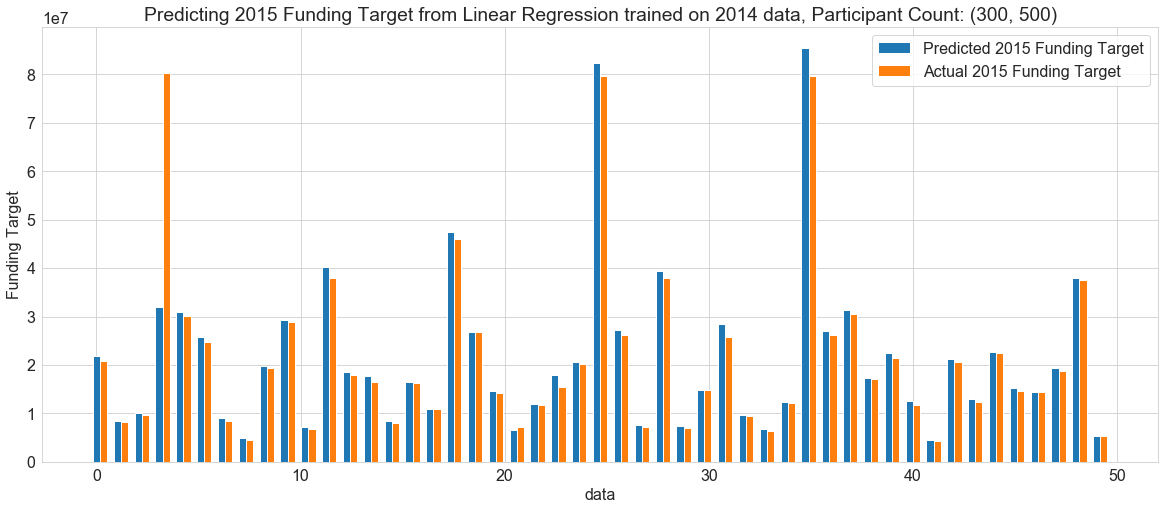

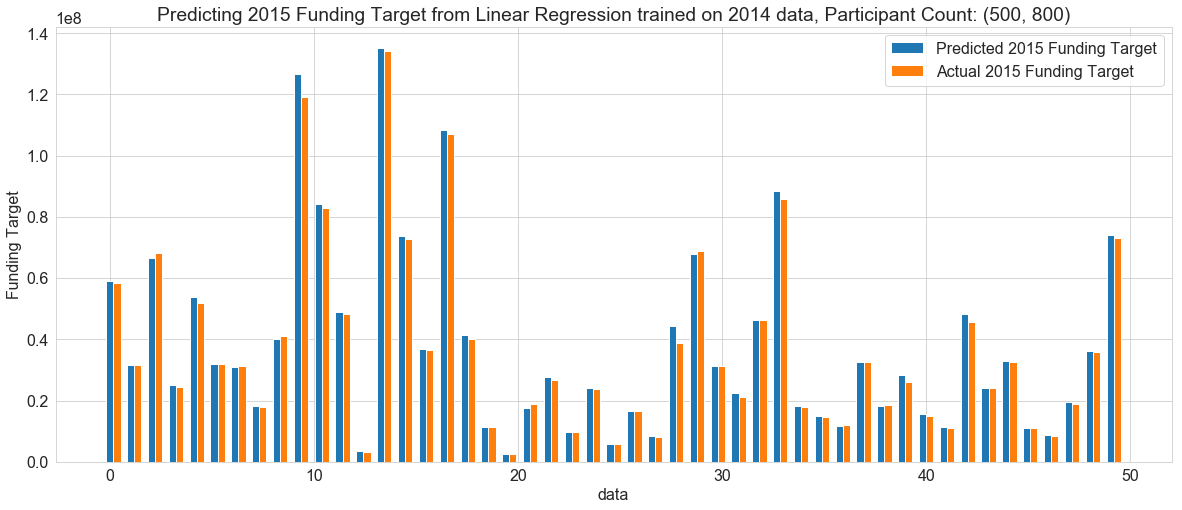

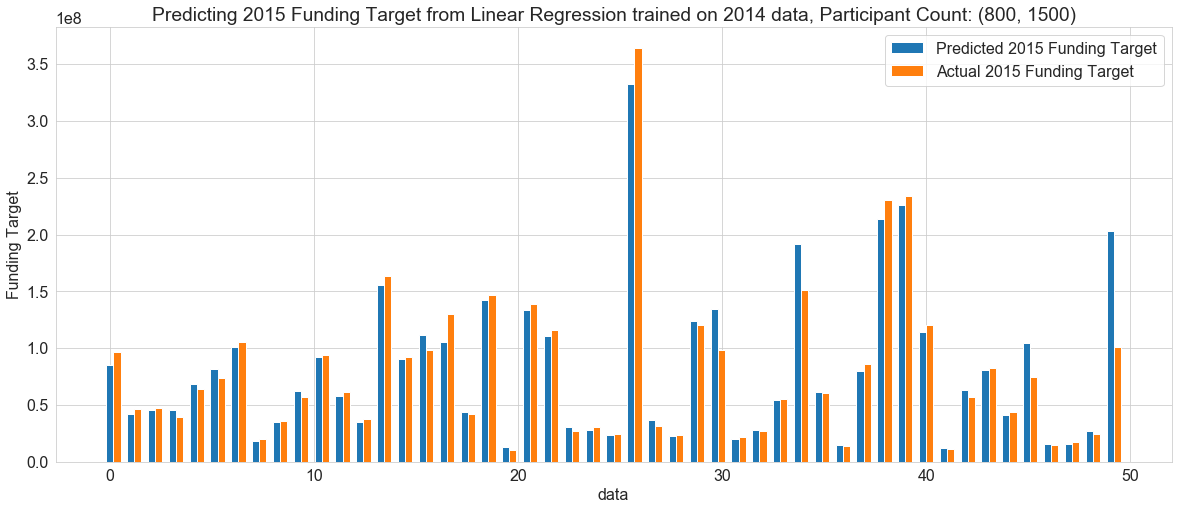

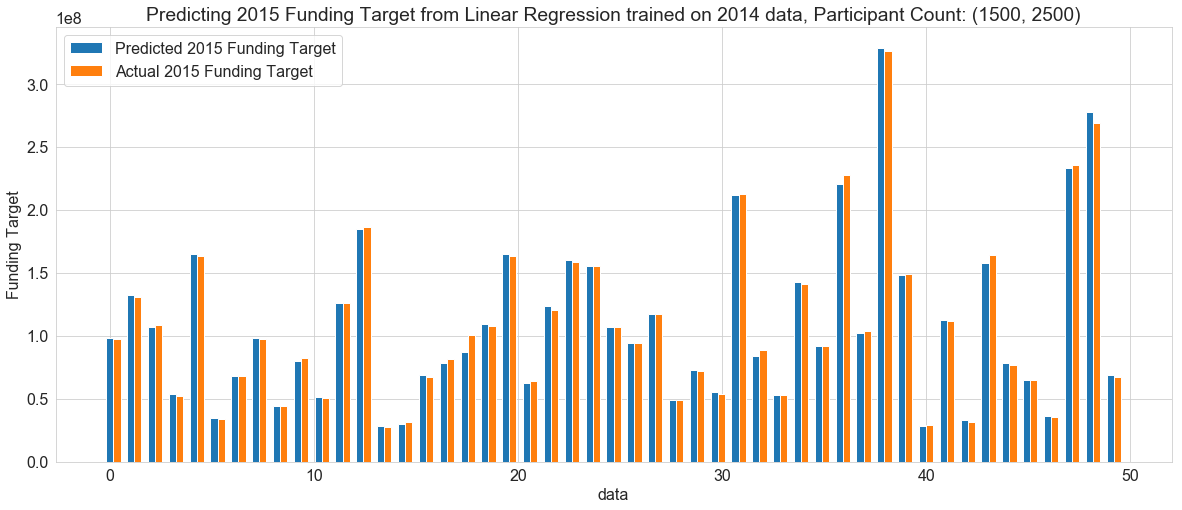

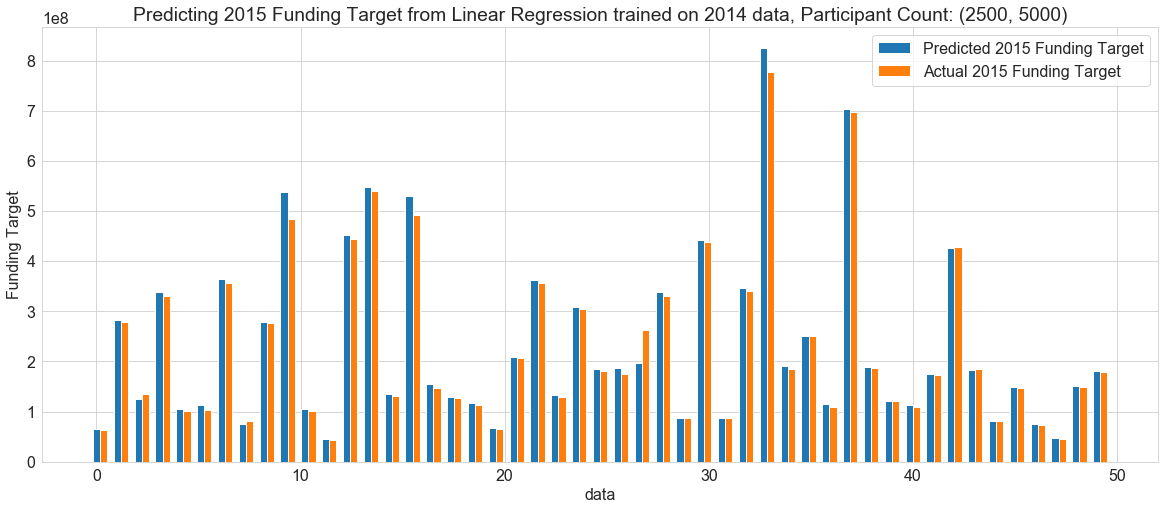

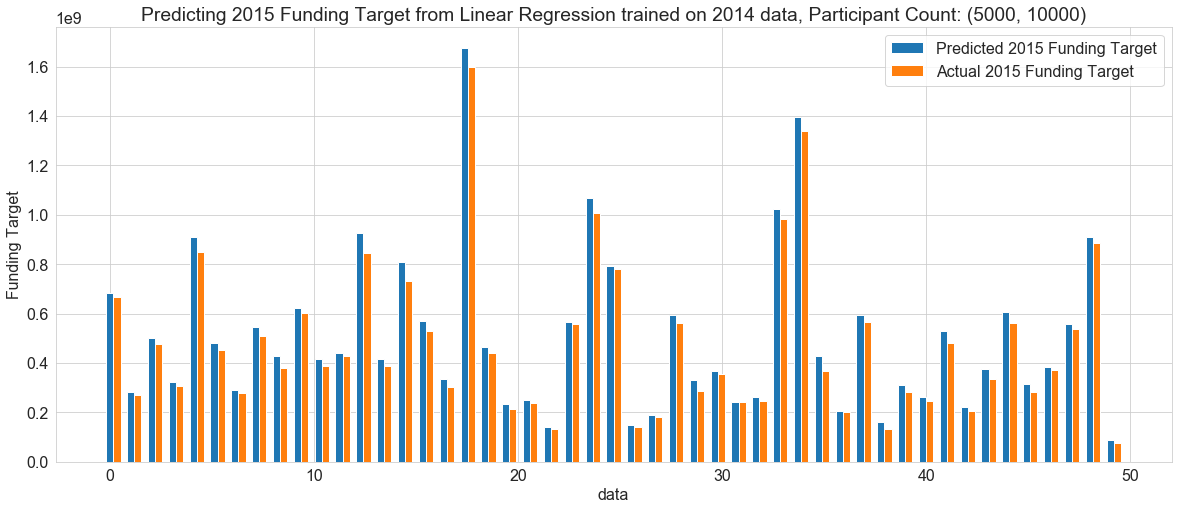

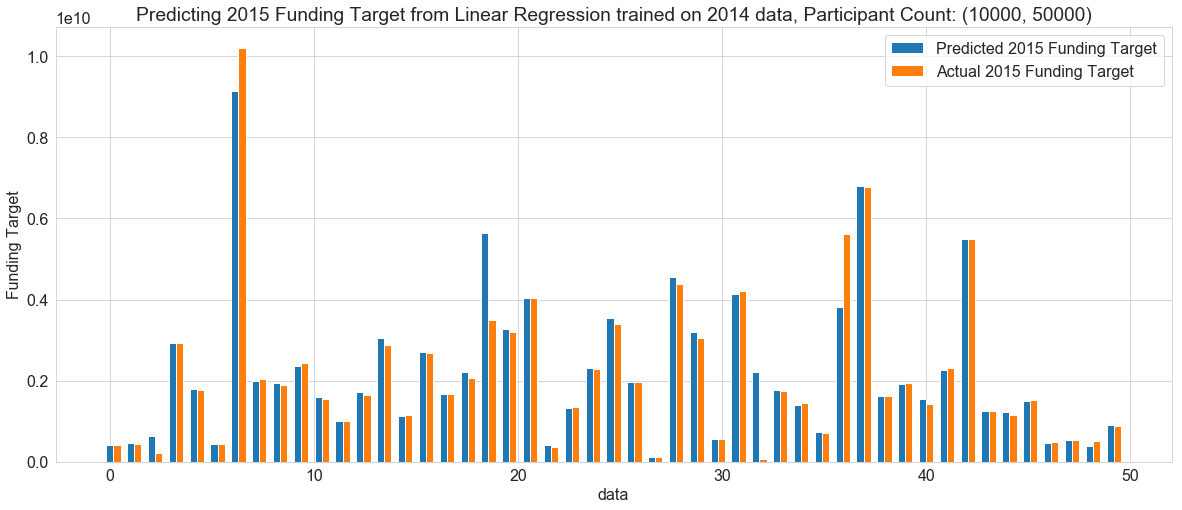

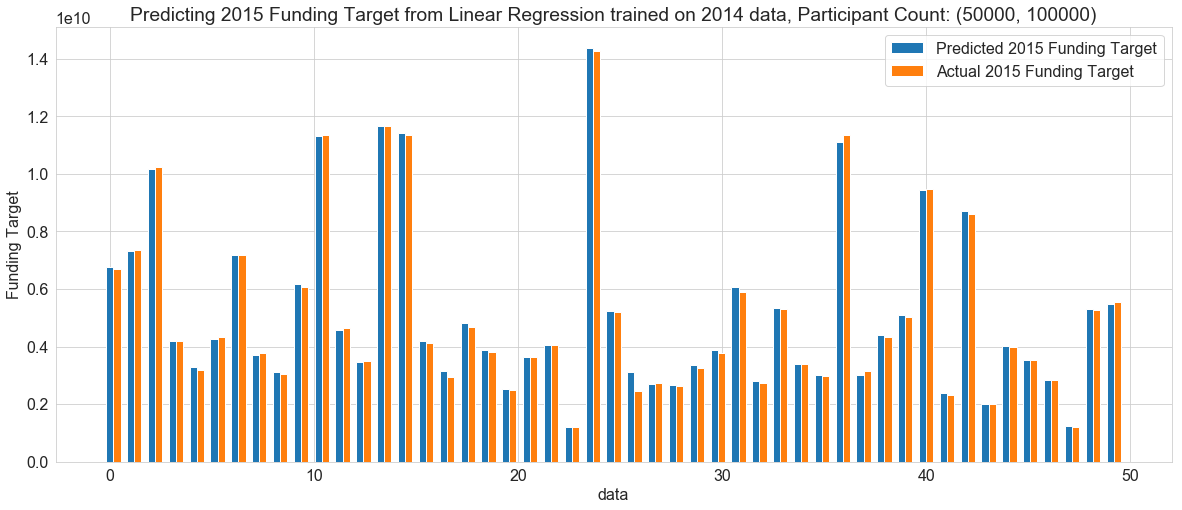

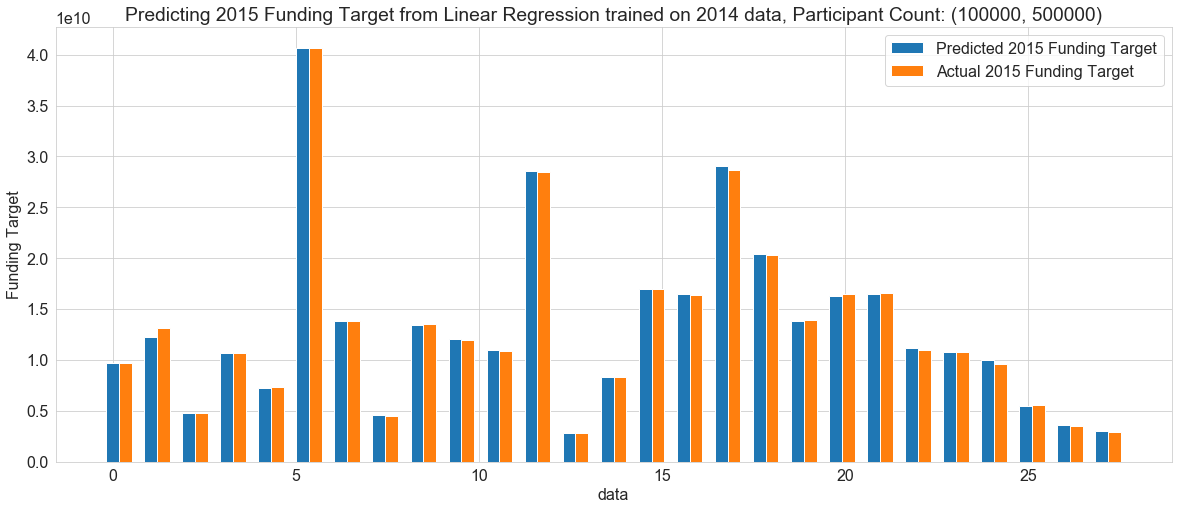

In [12]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    plot_results_bars(y_true, y_pred, i, 0, 50, 2015, 2014)

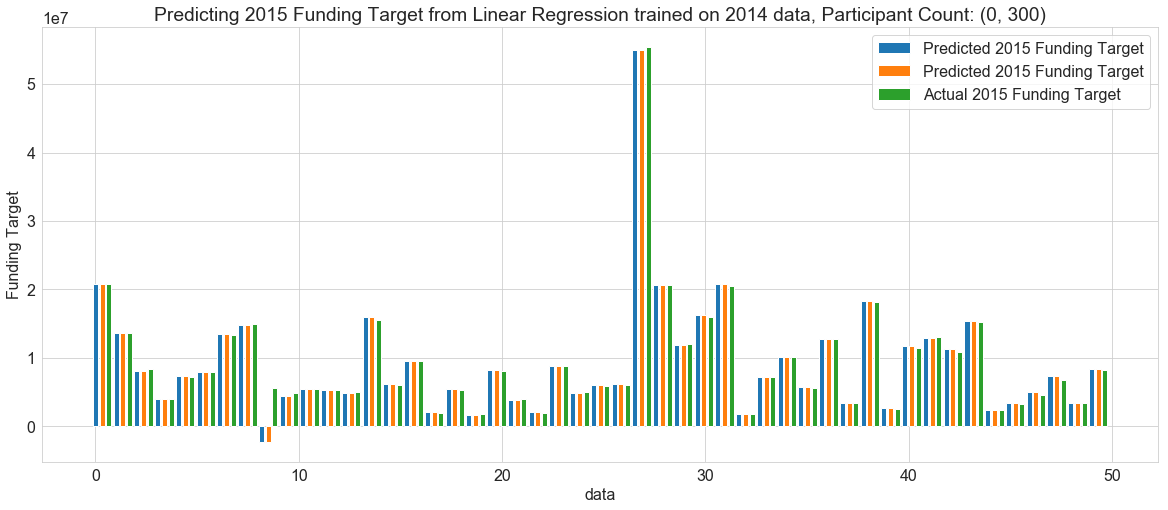

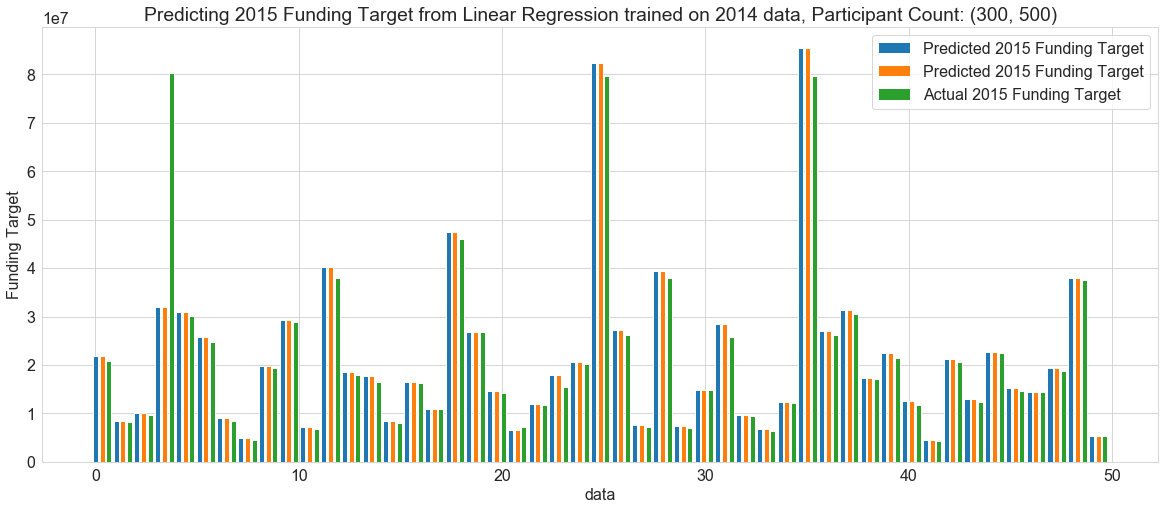

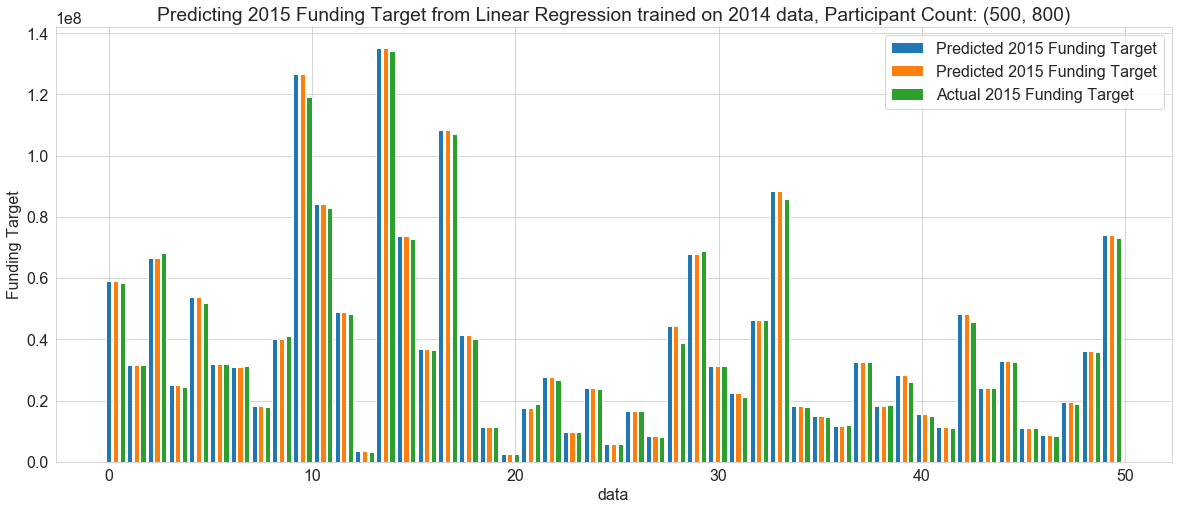

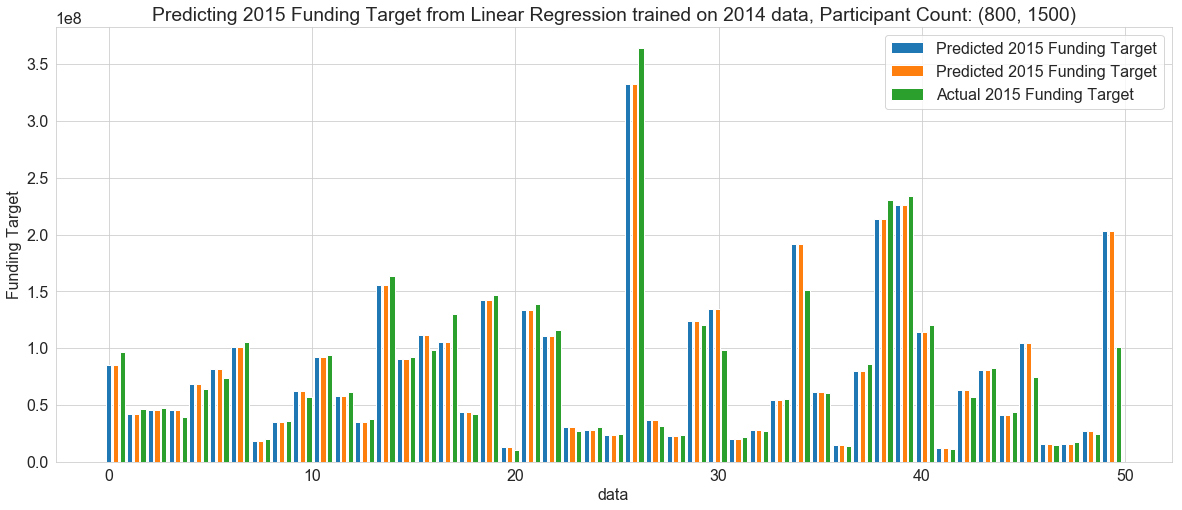

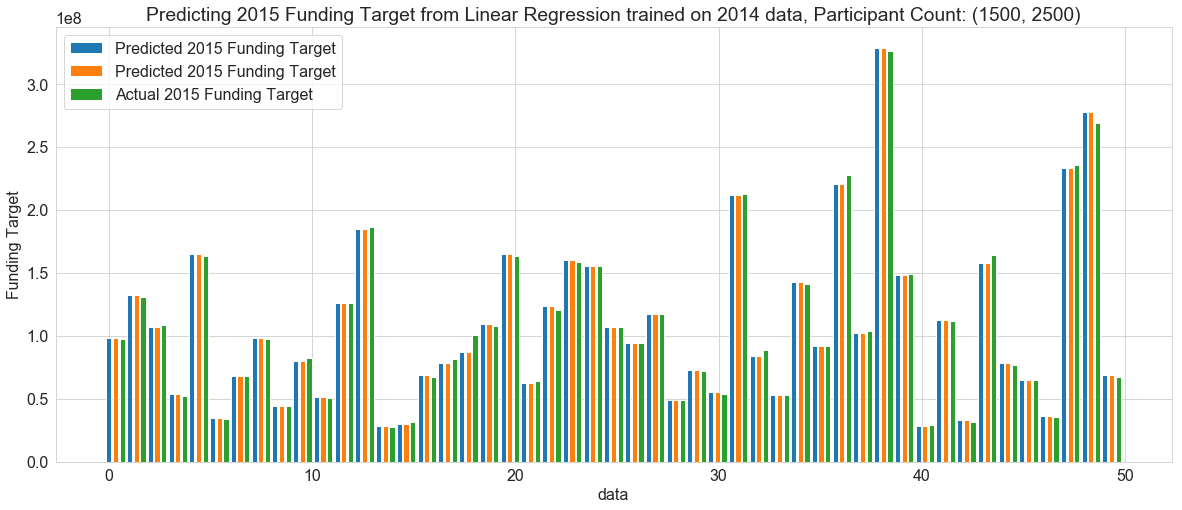

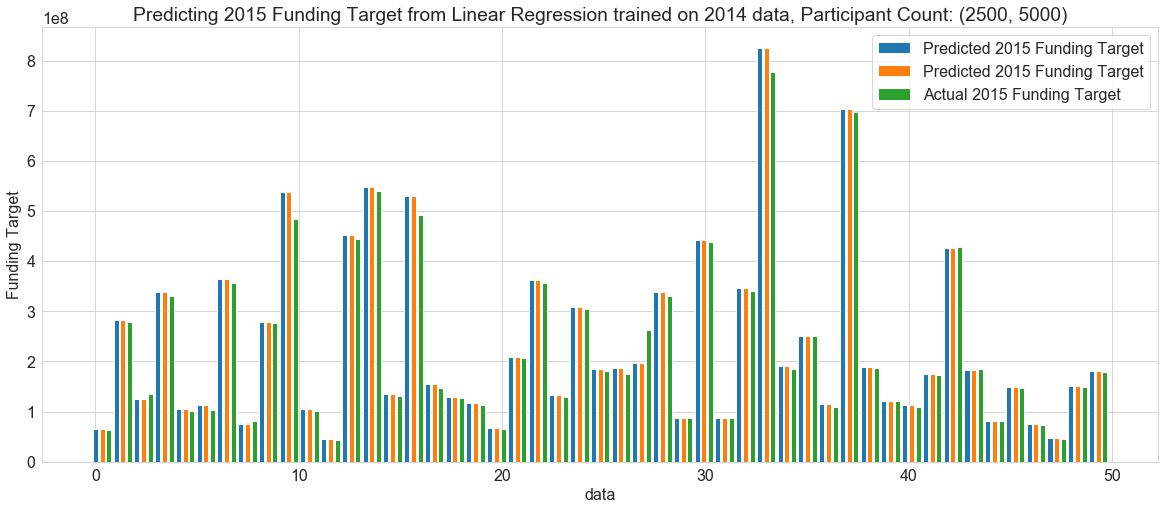

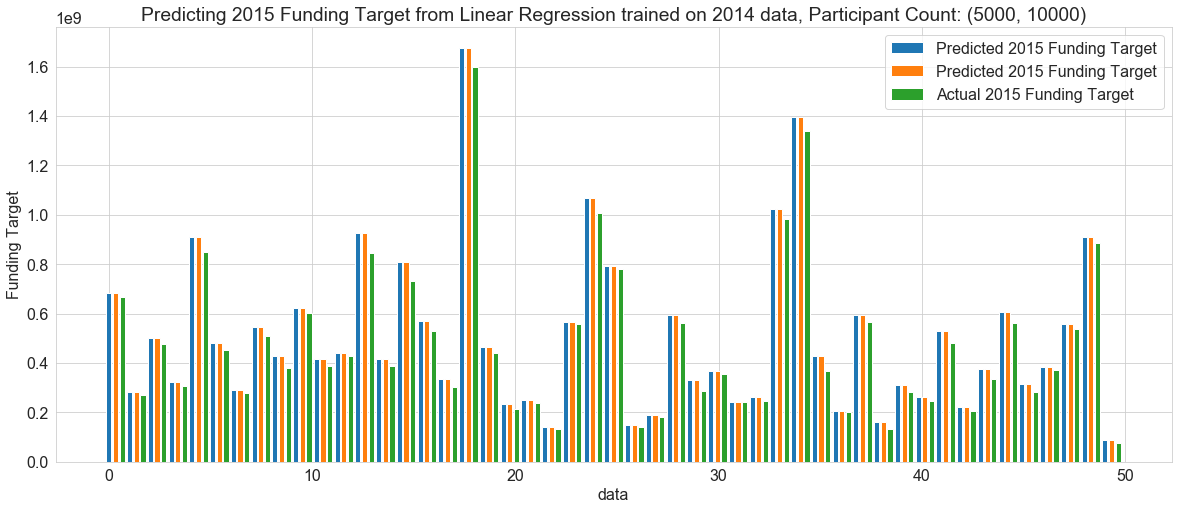

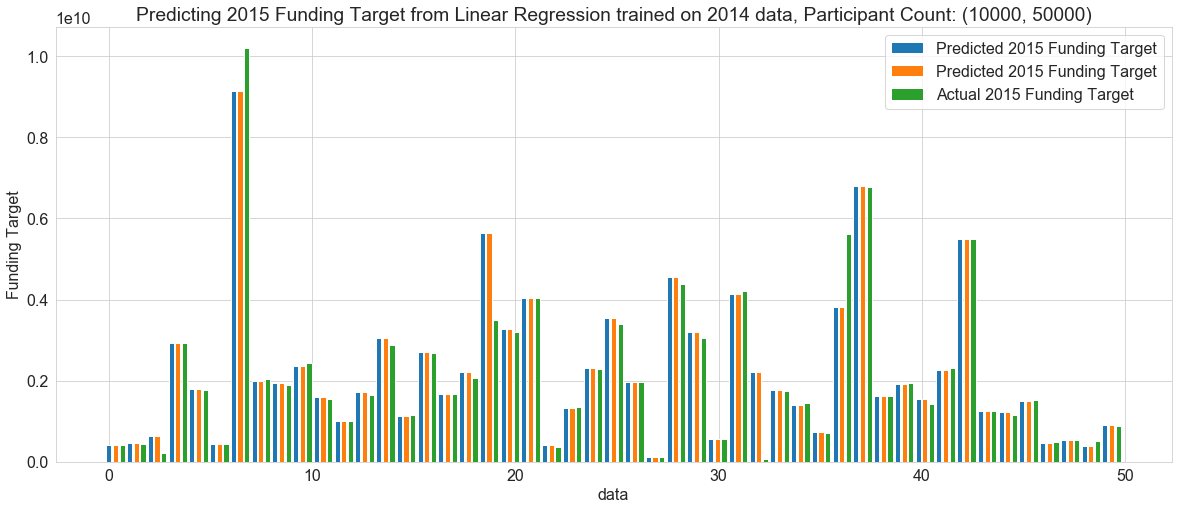

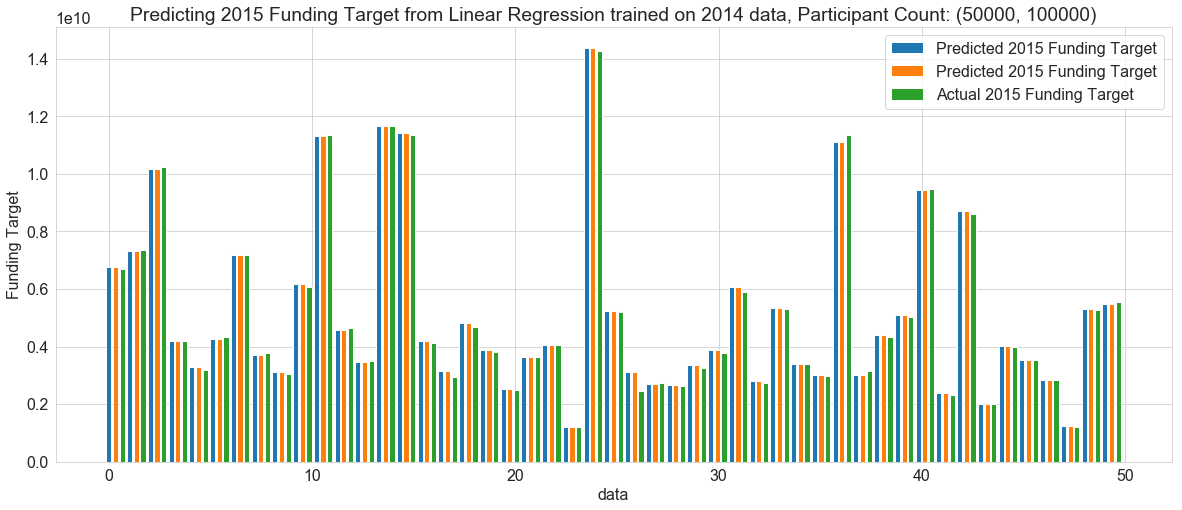

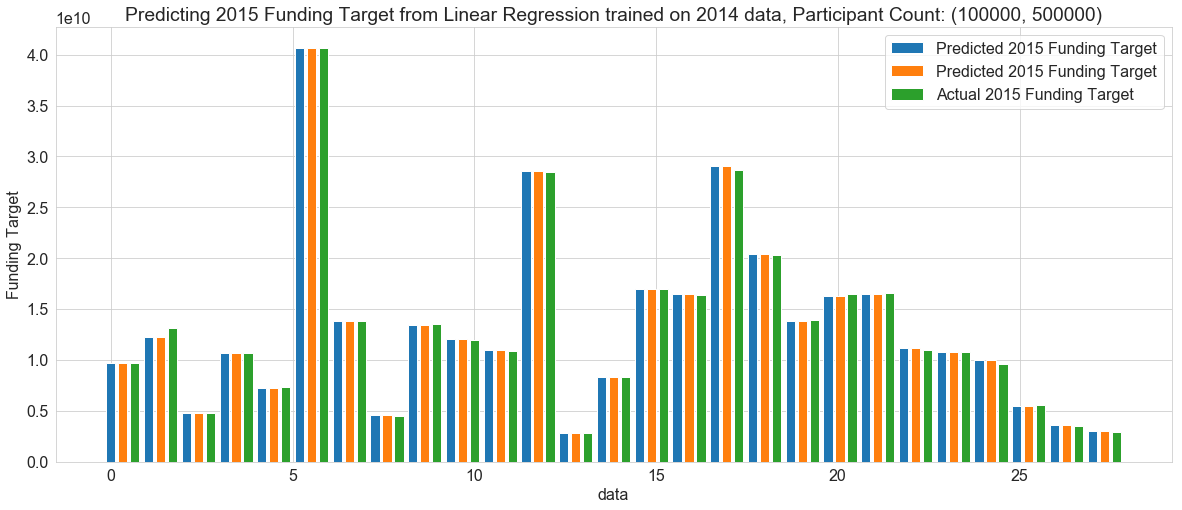

In [13]:
for i in partition_list:
    y_true = partitioned_dict_of_df_15[i][1]
    y_pred = predict_dict_15[i]
    y_pred_w = predict_dict_wls_15[i]
    plot_results_bars_compare(y_true, y_pred, y_pred_w, i, 0, 50, 2015, 2014)

In [ ]:
print(resids_15[(500,800)])

In [ ]:
for i in partition_list:
    plot_student_residuals(studentized_resids_15[i]['student_resid'], i, 2015, 2014)

<h1>Test on 2016 data:</h1>
<ul>
    <li>Get data
    <li>create dictionary of predictions
    <li>graph actual values vs predictions
    </ul>

In [14]:
partitioned_dict_of_df_16 = partition_feats_by_ptp_cnt(2016)

In [16]:
for i in partition_list:
    print('{} :'.format(i),len(partitioned_dict_of_df_16[i][0]))

(0, 300) : 221
(300, 500) : 81
(500, 800) : 49
(800, 1500) : 52
(1500, 2500) : 38
(2500, 5000) : 31
(5000, 10000) : 23
(10000, 50000) : 20
(50000, 100000) : 5
(100000, 500000) : 3


In [15]:
predict_dict_16 = {}
studentized_resids_16 = {}
for i in partition_list:
    X, y = partitioned_dict_of_df_16[i]
    predict_dict_16[i] = model_dict[i].predict(X)
    studentized_resids_16[i] = model_dict[i].outlier_test()

In [ ]:
for i in partition_list:
    y_true = partitioned_dict_of_df_16[i][1]
    y_pred = predict_dict_16[i]
    plot_results(y_true, y_pred, i, 2016, 2014)

In [ ]:
for i in partition_list:
    plot_student_residuals(studentized_resids_16[i]['student_resid'], i, 2016, 2014)

In [ ]:
full_data_15 = partition_more_feats_by_ptp_cnt(2015)

In [ ]:
df_15 = pd.DataFrame()
combined_15 = {}
for i in partition_list:
    combined_15[i] = pd.concat([full_data_15[i][0], pd.DataFrame(data=predict_dict_15[i], columns=['predicted_fndng_tgt_2016']), full_data_15[i][1]], axis=1)                        
    df_15 = pd.concat([df_15, combined_15[i]],axis=0)

In [ ]:
for col in df_15.columns:
    print(col)

In [ ]:
df_15.to_sql()